**Linear Regression:**<br>
Y = wX + b
* Y --> Dependent Variable
* X --> Independent Variable
* w --> weight
* b --> bias

**Gradient Descent:**<br>
Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms.It is used for
updating the parameters of the learning model.

* w = w - a*dw
* b = b- a*db

**Learning Rate:** <br>
Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum
of a loss function.


In [28]:
# Importing the Library
import numpy as np

**Linear Regression**

In [29]:
class Linear_Regression():

# initiating the parameters (learning rate and no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y):

    # no. of training examples and no. of features
    self.m ,self.n = X.shape   #no. of rows(m) and columns(n)

    # initiating the weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculate the Gradient
    dw = -(2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = -(2 * np.sum(self.Y - Y_prediction)) / self.m

    # updating the weights
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

    # line function for prediction
  def predict(self, X):

    return X.dot(self.w) + self.b


**Using Linear Regression make Prediction**

**Work flow of the Linear Regression model :**
* Step I: Set Learning Rate & Numbér of Iterations; Initiate Random weight and bias value.
* Step 2: Build Linear Regression Equation. (y = wx + b)
* Step 3: Find the "y prediction" value for given x value for the corresponding weight & bias.
* Step 4: Check the loss function for these parameter values. ( difference between "y prediction" & "true y")
* Step 5: Update the parameter values using Gradient Descent. (new weight & bias value)
* Step 6: Step 3, 4, 5 are repeated till we get minimum loss function <br>

Finally we Will get the best model (best weight and bias value) as it has minimum loss function.


In [30]:
# importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Pre-Processing

In [31]:
# laoding the csv file into pandas DataFrame
salary_data  = pd.read_csv('/content/salary_data.csv')

In [32]:
# first five rows of Dataset
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [33]:
# last five rows of Dataset
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [34]:
# the no. of rows and column in the dataset
salary_data.shape

(30, 2)

In [35]:
# checking if there is any missing value in the dataset
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

    No missing value

**Splitting the feature and target**

In [36]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [37]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [38]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the dataset into Training and Test Data

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)

In [45]:
print(X.shape, X_train.shape, X_test.shape)

(30, 1) (21, 1) (9, 1)


Training the Linear Regression Model

In [66]:
model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [67]:
model.fit(X_train, Y_train)

In [68]:
# printing the parameter values(weight & bias)

print("Weight", model.w[0])
print("Bias", model.b)

Weight 9534.934692142133
Bias 23735.972514255136


    
    Y = 9534(X) + 23735
    or
    salary = 9534(experince) + 23735

Predict the salary value for the test data

In [69]:
test_data_prediction = model.predict(X_test)

In [70]:
print(test_data_prediction)

[ 36131.38761404  34224.40067561  66643.17862889  59015.23087518
  91434.00882846  80945.58066711 101922.43698982  52340.77659068
  42805.84189854]


**Visualizing the predicted Value and Actual Value**

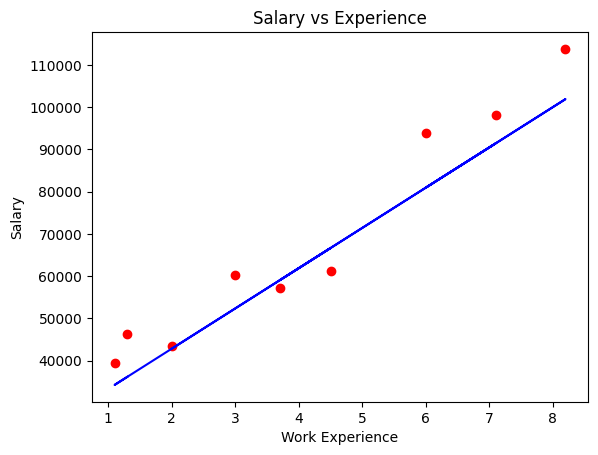

In [71]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()

      Hasrat Ali
      Thank You:)